In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 2], 
              [2, 3], 
              [3, 4],
              [4, 5] ])

y = np.array([[5],
     [6],
     [7],
     [8]])

print(X) 
print(y)

[[1 2]
 [2 3]
 [3 4]
 [4 5]]
[[5]
 [6]
 [7]
 [8]]


In [3]:
print(X[1]) # Less good for some computations
print(X[[1]]) # This method is better for working with matrices

[2 3]
[[2 3]]


In [4]:
m = X.shape[0]
n = X.shape[1]
m,n

(4, 2)

In [5]:
# add dummy feature to X using scikit-learn dummy feature (sklearn.preprocessing.add_dummy_feature)
from sklearn.preprocessing import add_dummy_feature

X = add_dummy_feature(X)
X

array([[1., 1., 2.],
       [1., 2., 3.],
       [1., 3., 4.],
       [1., 4., 5.]])

In [6]:
eta = 0.1 # learning rate, another name for alpha in this case
n_epochs = 10 # number of iterations over the training set

# how do we choose n_epochs?
# - choose very large number
# - iterations depends on how much theta changes each iteration
# functions take both n_epochs and tolerance, and stops once either of these methods reaches its limit

In [7]:
def h(theta, x):
    return x @ theta

In [8]:
theta = np.array([[0.1],
                  [0.1],
                  [0.1]]) # three thetas, because there's 2 features and the dummy feature
print(theta) 
print(X[[0]])
h(theta, X[[0]])

[[0.1]
 [0.1]
 [0.1]]
[[1. 1. 2.]]


array([[0.4]])

In [9]:
# how about the whole training set?
h(theta, X) # applies to whole matrix at once because numpy is cool

array([[0.4],
       [0.6],
       [0.8],
       [1. ]])

In [10]:
def J(theta, X, y): # Not too important for regression, but can be used to graph error
    return 1/(2*m) * np.sum( (h(theta,X) - y)**2 )

In [11]:
J(theta, X, y)

np.float64(17.22)

In [12]:
def G(theta, X, y):
    return 1/m * X.T @ (h(theta,X) - y)

[[0.36293057]
 [0.7352551 ]
 [0.99818567]]


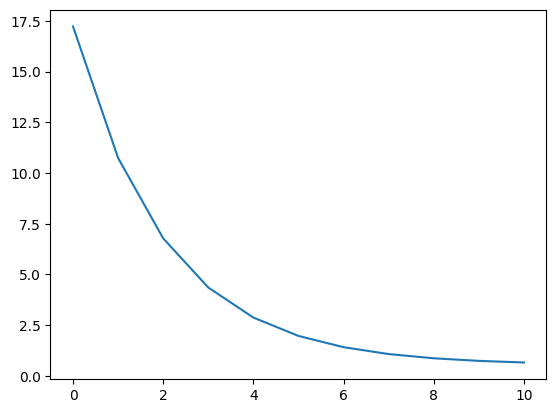

In [13]:
eta = 0.01 # learning rate
n_epochs = 10
theta = np.array([[0.1],
                  [0.1],
                  [0.1]])

E = [J(theta, X, y)] # errors (costs) list

for epoch in range(n_epochs):
  theta -= eta * G(theta, X, y)
  E.append( J(theta, X, y) )

# plot error vs epoch
plt.plot(E)

# print final theta
print(theta)

In [14]:
# stochastic gradient, we only use one training sample to calculate the gradient
# the benefit is that we don't calculate the gradient using the whole training set
# the downside is that the gradient is noisy and might not always point in the right direction
# still, it's a great way to make progress when the training set is large

def G_stochastic(theta, X, y):
    # pick a random training sample
    i = np.random.randint(m)
    return G(theta, X[[i]], y[[i]])

[[0.2175985 ]
 [0.4357498 ]
 [0.55334829]]


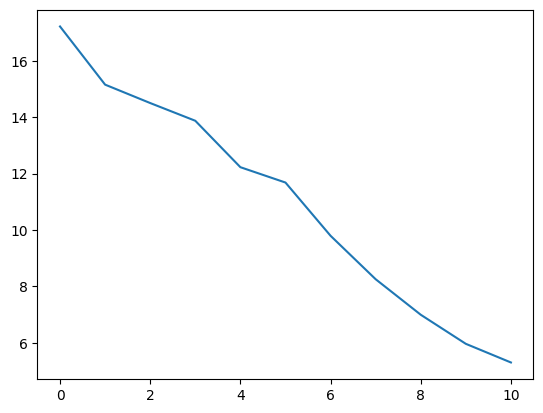

In [15]:
# this is the same as before, but we use G_stochastic instead of G
# cost will be more noisy, but we should still make progress

eta = 0.01 # learning rate
n_epochs = 10
theta = np.array([[0.1],
                  [0.1],
                  [0.1]])

E = [J(theta, X, y)] # errors (costs) list

for epoch in range(n_epochs):
  theta -= eta * G_stochastic(theta, X, y)
  E.append( J(theta, X, y) )

# plot error vs epoch
plt.plot(E)

# print final theta
print(theta)